In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load dataset
df = pd.read_csv('dataset/stack_overflow_2025_cleaned_eda.csv')
df.head()


,ResponseId,Age,Country,EdLevel,Employment,WorkExp,YearsCode,OrgSize,Industry,MainBranch,DevType,ICorPM,RemoteWork,LearnCode,LearnCodeChoose,LearnCodeAI,AIThreat,AISelect,AISent,AIOpen,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,DevEnvsHaveWorkedWith,ConvertedCompYearly,JobSat
0,1,25-34 years old,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,8.0,14.0,20 to 99 employees,Fintech,I am a developer by profession,"Developer, mobile",People manager,Remote,Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",I'm not sure,"Yes, I use AI tools monthly or infrequently",Indifferent,"Troubleshooting, profiling, debugging",Bash/Shell (all shells);Dart;SQL,Dart,Cloud Firestore;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,Unknown,Android Studio;Notepad++;Visual Studio;Visual ...,61256.0,10.0
1,2,25-34 years old,Netherlands,"Associate degree (A.A., A.S., etc.)",Employed,2.0,10.0,500 to 999 employees,Retail and Consumer Services,I am a developer by profession,"Developer, back-end",Individual contributor,"Hybrid (some in-person, leans heavy to flexibi...",Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",I'm not sure,"Yes, I use AI tools weekly",Indifferent,All skills. AI is a flop.,Java,Java;Python;Swift,Dynamodb;MongoDB,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Spring Boot,IntelliJ IDEA;PyCharm;Visual Studio Code;Xcode,104413.0,9.0
2,3,35-44 years old,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",10.0,12.0,Unknown,Software Development,I am a developer by profession,"Developer, front-end",Unknown,Unknown,Online Courses or Certification (includes all ...,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools daily",Favorable,"Understand how things actually work, problem s...",Dart;HTML/CSS;JavaScript;TypeScript,Dart;HTML/CSS;JavaScript;TypeScript,MongoDB;MySQL;PostgreSQL,Datadog;Firebase;npm;pnpm,Next.js;Node.js;React,Visual Studio Code,53061.0,8.0
3,4,35-44 years old,Ukraine,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,4.0,5.0,"10,000 or more employees",Retail and Consumer Services,I am a developer by profession,"Developer, back-end",Individual contributor,Remote,"Other online resources (e.g. standard search, ...","Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools weekly",Favorable,Unknown,Java;Kotlin;SQL,Java;Kotlin,Unknown,Amazon Web Services (AWS);Google Cloud,Spring Boot,Unknown,36197.0,6.0
4,5,35-44 years old,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",21.0,22.0,Unknown,Software Development,I am a developer by profession,Engineering manager,Unknown,Unknown,Unknown,"No, I am not new to coding and did not learn n...","Yes, I learned how to use AI-enabled tools for...",No,"Yes, I use AI tools weekly",Favorable,"critical thinking, the skill to define the tas...",C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,C#;Java;JavaScript;Python;SQL;TypeScript,Elasticsearch;Microsoft SQL Server;MySQL;Oracl...,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Angular;ASP.NET;ASP.NET Core;Flask;jQuery,Eclipse;IntelliJ IDEA;Jupyter Notebook/Jupyter...,60000.0,7.0


## 3. AI & Learning Analysis

### Learned AI or not

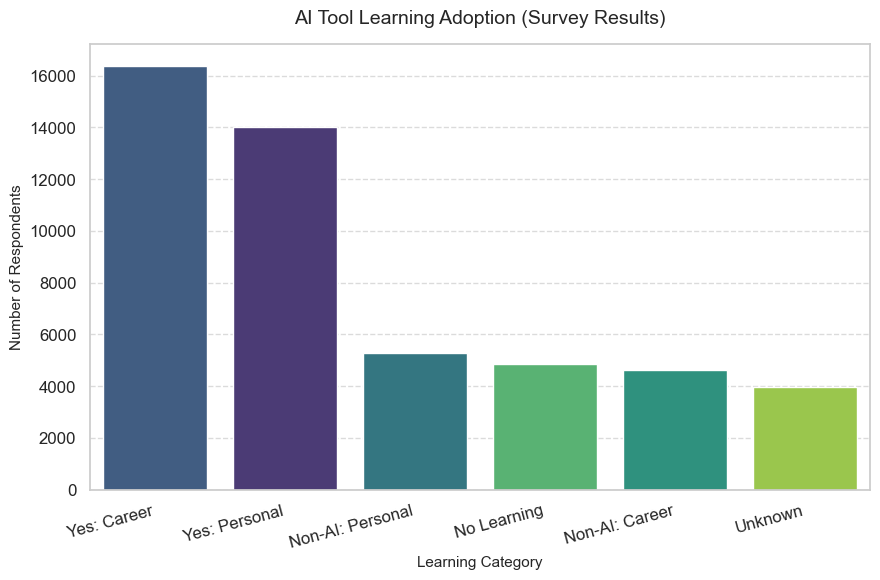

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. More concise mapping for a cleaner X-axis
label_map = {
    'Yes, I learned how to use AI-enabled tools required for my job or to benefit my career': 'Yes: Career',
    'Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies': 'Yes: Personal',
    'No, I didn\'t spend time learning in the past year': 'No Learning',
    'No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies': 'Non-AI: Personal',
    'No, I learned something that was not related to AI or AI enablement as required for my job or to benefit my career': 'Non-AI: Career',
}

# Apply mapping (using .get to handle any missing keys gracefully)
df['Short_LearnCodeAI'] = df['LearnCodeAI'].map(label_map).fillna('Unknown')

# 2. Updated Plotting Code to fix FutureWarning
plt.figure(figsize=(9, 6))

sns.countplot(
    data=df, 
    x='Short_LearnCodeAI', 
    hue='Short_LearnCodeAI',  # Assigning hue to x to satisfy the new Seaborn requirement
    order=df['Short_LearnCodeAI'].value_counts().index,
    palette='viridis',
    legend=False             # Hide legend since the X-axis already labels the bars
)

plt.title('AI Tool Learning Adoption (Survey Results)', fontsize=14, pad=15)
plt.xticks(rotation=15, ha='right') # Very slight rotation for better fit
plt.xlabel('Learning Category', fontsize=11)
plt.ylabel('Number of Respondents', fontsize=11)

# Optional: Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### AI Sentiment

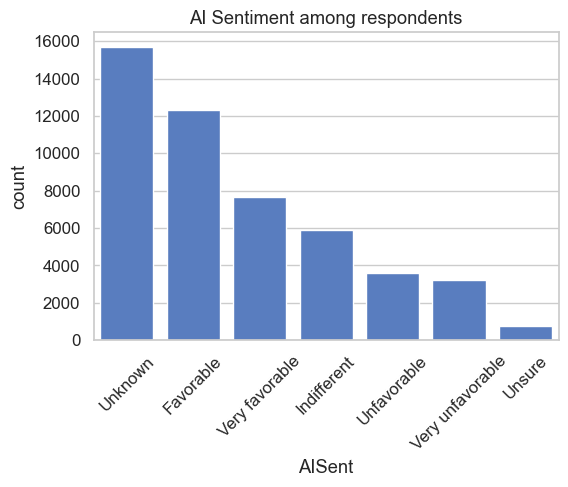

In [3]:
# AI Sentiment
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='AISent', order=df['AISent'].value_counts().index)
plt.xticks(rotation=45)
plt.title('AI Sentiment among respondents')
plt.show()

### AI Threat perception

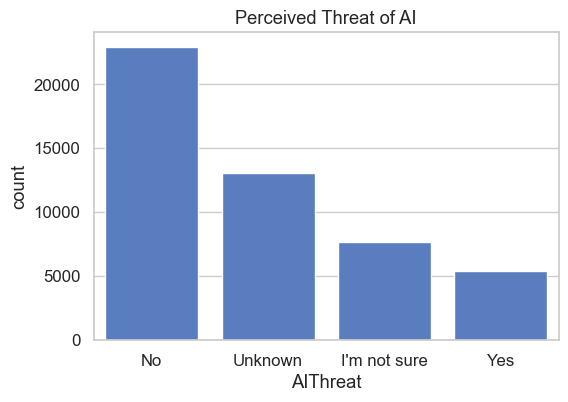

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='AIThreat', order=df['AIThreat'].value_counts().index)
plt.title('Perceived Threat of AI')
plt.show()

## 4. Skills Analysis (Languages, Databases, Platforms)

### Languages

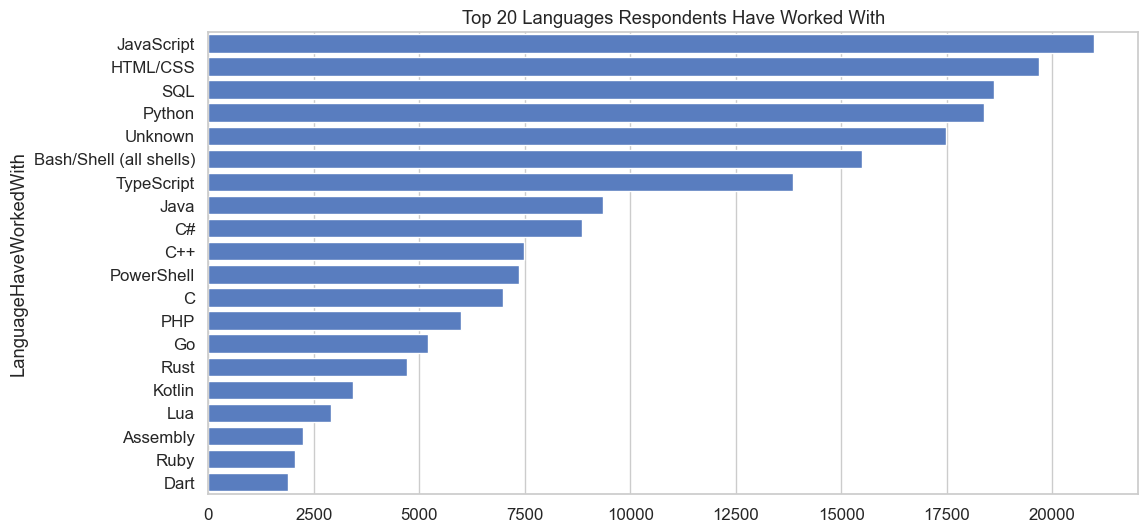

In [5]:
# Split multi-value column and explode
df_languages = df['LanguageHaveWorkedWith'].str.split(';').explode()
lang_counts = df_languages.value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=lang_counts.values, y=lang_counts.index)
plt.title('Top 20 Languages Respondents Have Worked With')
plt.show()

### Databases

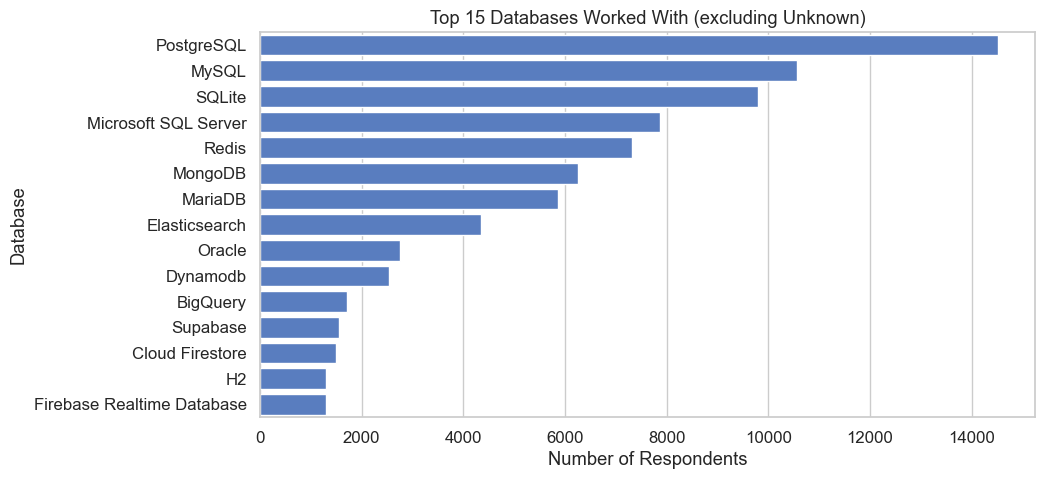

In [6]:
# Split and explode
df_db = df['DatabaseHaveWorkedWith'].str.split(';').explode()

# Remove 'Unknown' and count top 15
db_counts = df_db[df_db != 'Unknown'].value_counts().head(15)

# Plot horizontal bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=db_counts.values, y=db_counts.index)
plt.title('Top 15 Databases Worked With (excluding Unknown)')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.show()


## 5. Job Satisfaction & Compensation

### Job satisfaction distribution

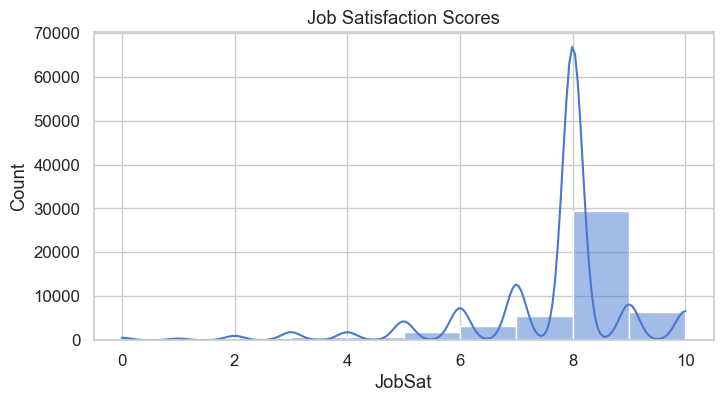

In [7]:
# Job Satisfaction distribution
plt.figure(figsize=(8,4))
sns.histplot(df['JobSat'].dropna(), bins=10, kde=True)
plt.title('Job Satisfaction Scores')
plt.show()

### Compensation Distribution

### With Outliers

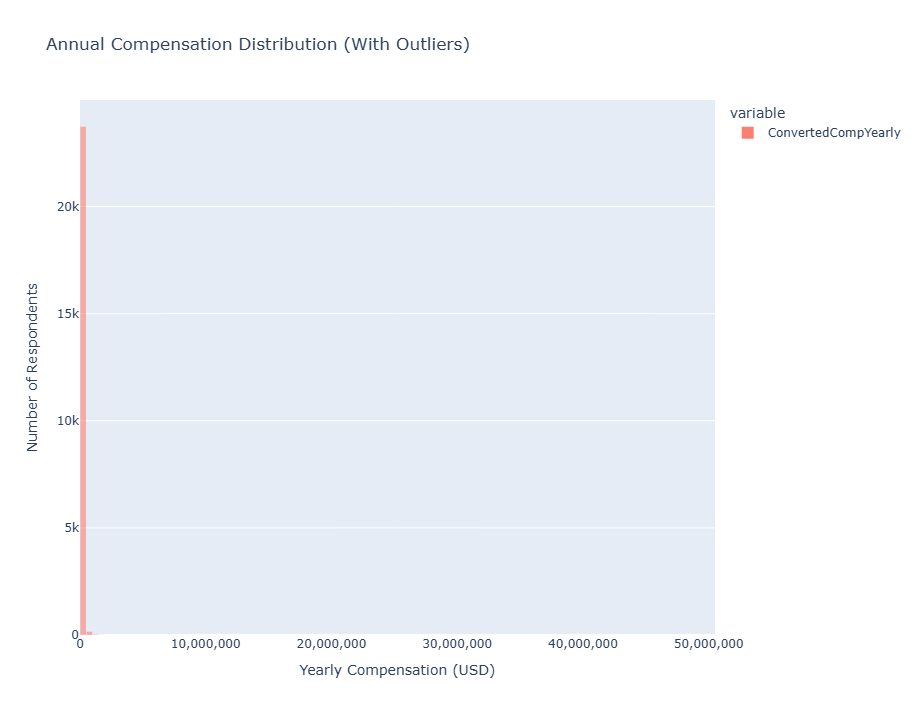

In [8]:
import plotly.express as px

# Drop missing values
comp_data = df['ConvertedCompYearly'].dropna()

fig = px.histogram(
    comp_data,
    nbins=100,                # number of bins
    title='Annual Compensation Distribution (With Outliers)',
    labels={'value':'Yearly Compensation (USD)', 'count':'Number of Respondents'},
    opacity=0.6,
    color_discrete_sequence=['salmon']
)

# Update layout for readability
fig.update_layout(
    width=1200,               # increase overall width
    height=700,               # increase overall height
    xaxis_title='Yearly Compensation (USD)',
    yaxis_title='Number of Respondents',
    xaxis_tickformat=',',     # format large numbers with commas
    bargap=0.1
)

fig.show()



### Without Outliers

In [9]:
comp_data = df['ConvertedCompYearly'].dropna()

# Keep salaries within 0–300,000 USD (most respondents)
comp_data_filtered = comp_data[comp_data <= 300000]


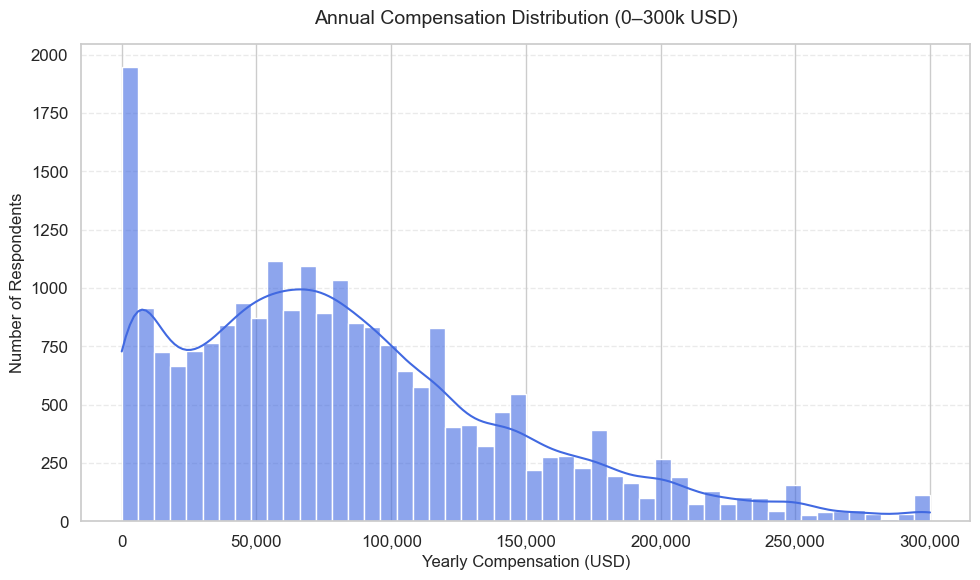

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(
    comp_data_filtered, 
    bins=50, 
    kde=True, 
    color='royalblue', 
    alpha=0.6, 
    edgecolor='white'
)

# Format X-axis numbers with commas
from matplotlib.ticker import StrMethodFormatter
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Labels and title
plt.title('Annual Compensation Distribution (0–300k USD)', fontsize=14, pad=15)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


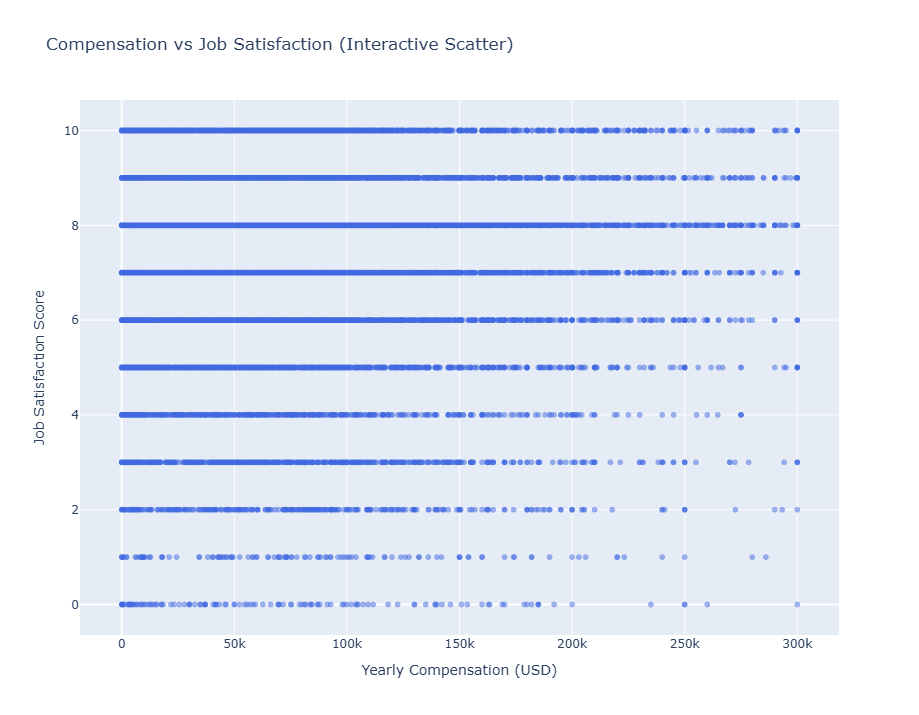

In [12]:
import plotly.express as px

fig = px.scatter(
    df[df['ConvertedCompYearly'] <= 300000],
    x='ConvertedCompYearly',
    y='JobSat',
    opacity=0.5,
    color_discrete_sequence=['royalblue'],
    title='Compensation vs Job Satisfaction (Interactive Scatter)',
    labels={'ConvertedCompYearly':'Yearly Compensation (USD)', 'JobSat':'Job Satisfaction Score'}
)
fig.update_layout(width=1200, height=700)
fig.show()


## 6. Correlation heatmap (numeric)

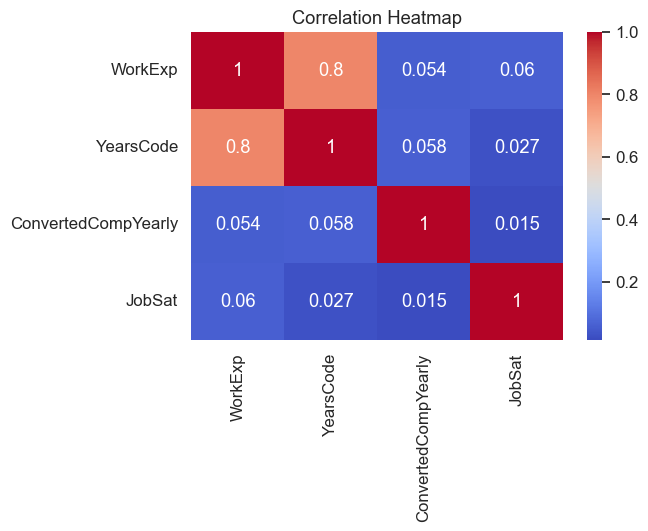

In [12]:
numeric_cols = ['WorkExp','YearsCode','ConvertedCompYearly','JobSat']
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


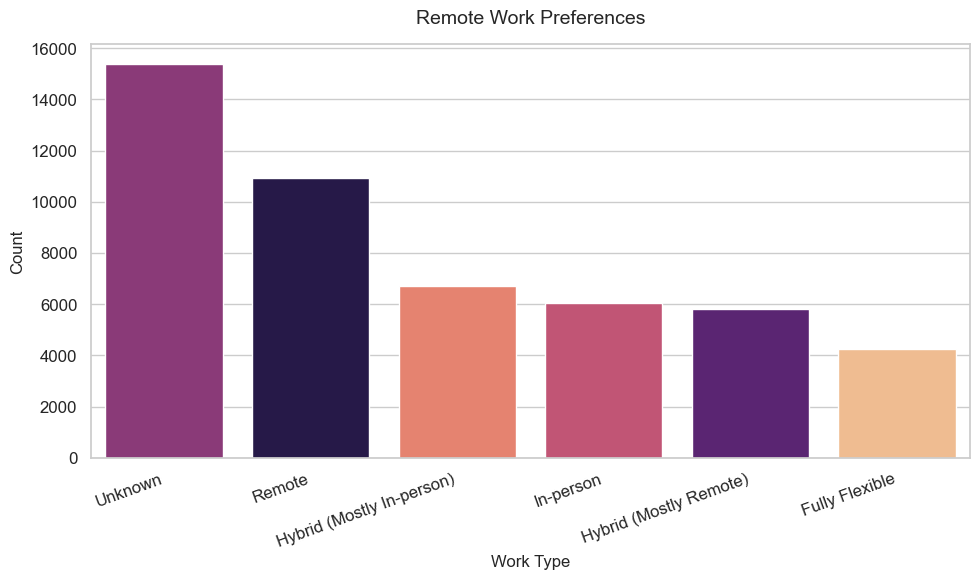

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Map long descriptions to short, readable labels
remote_map = {
    'Remote': 'Remote',
    'In-person': 'In-person',
    'Hybrid (some remote, leans heavy to in-person)': 'Hybrid (Mostly In-person)',
    'Hybrid (some in-person, leans heavy to flexibility)': 'Hybrid (Mostly Remote)',
    'Your choice (very flexible, you can come in when you want or just as needed)': 'Fully Flexible',
    'Unknown': 'Unknown'
}

# Apply the mapping
df['RemoteWork_Short'] = df['RemoteWork'].map(remote_map)

# 2. Plotting
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df, 
    x='RemoteWork_Short', 
    hue='RemoteWork_Short', # Fixes FutureWarning
    order=df['RemoteWork_Short'].value_counts().index,
    palette='magma',
    legend=False
)

plt.title('Remote Work Preferences', fontsize=14, pad=15)
plt.xticks(rotation=20, ha='right') # Slight rotation for better fit
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()